# Linear Regression California Education Level and Pay Grade

## 1. Import Libraries and Data 
## 2. Data Cleaning
## 3. Check for Extreme Values
## 4. Data Prep for Regression Analysis
## 5. Regression analysis
## 6. Check Model Performance with statistics
## 7. Conclusion

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Allow graphs created to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 25)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,...,18.8,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,13,1,1,2,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,...,29.2,9.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,12.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,10.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,13.4,6.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA


### 2. Data Cleaning

In [7]:
#subset into California as it is the state with 2nd highest amount of workers (District of Columbia being 1)

In [8]:
df_cali =  df[df['state']=='CALIFORNIA']

In [9]:
df_cali.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
21,AMERICAN BATTLE MONUMENTS COMMISSION,United States,40-44,BACHELORS,13.0,10 - 14,HUMAN RESOURCES MANAGEMENT,Administrative,GS-GENERAL SCHEDULE,0,...,14.6,6.0,PERSONNEL MGMT & INDUSTRIAL RELATIONS,2.0,AMERICAN BATTLE MONUMENTS COMMISSION,13,1,1,8,CALIFORNIA
122,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,60-64,MASTERS,13.0,10 - 14,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,10.0,10.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA
123,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,40-44,BACHELORS,13.0,5 - 9,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,8.3,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,13,1,1,8,CALIFORNIA
129,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,65 or more,BETWEEN HS & BACHELORS,9.0,35 or more,TECHNICAL WRITING AND EDITING,Administrative,GS-GENERAL SCHEDULE,0,...,37.7,11.0,INFORMATION AND ARTS,2.0,DEPARTMENT OF THE AIR FORCE,10,1,1,8,CALIFORNIA
147,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,55-59,MASTERS,13.0,20 - 24,OPERATIONS RESEARCH,Professional,GS-GENERAL SCHEDULE,1,...,22.2,9.0,MATHEMATICS AND STATISTICS,1.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA


In [10]:
df_cali.shape

(141103, 25)

In [11]:
# I am looking at education code and pay grade as you would think the more education you have, the higher the pay grade and our variable relationships showed a correlation

In [12]:
# Check for missing values

df_cali.isnull().sum()

sub_agency                 0
country                    0
age_level                  0
education_level            0
pay_grade              51340
years_grouping             0
occupation                 0
occupation_category        0
pay_plan                   0
stem                       0
supervisor_status          0
full_time                  0
work_status                0
date                       0
salary                   624
years_of_service           0
age_level_code             0
occupation_family      71108
occupation_code            0
agency                     0
education_code             0
work_status_code           0
full_time_code             0
supervisor_code            0
state                      0
dtype: int64

In [13]:
#create data frame with missing values to see examples of what is missing
df_nan = df_cali[df_cali['pay_grade'].isnull() == True]

In [14]:
df_nan

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
15831,AIR EDUCATION AND TRAINING COMMAND,United States,50-54,BACHELORS,NaN,5 - 9,HEAVY MOBILE EQUIPMENT MECHANIC,Blue Collar,WS-SUPERVISORY PAY SCHEDULES - FEDERAL WAGE SY...,0,...,7.1,8.0,TRANSPORT/MOBILE EQUIPMENT MAINTENANCE,6.0,DEPARTMENT OF THE AIR FORCE,13,1,1,2,CALIFORNIA
22517,"HEADQUARTERS, AIR FORCE RESERVE COMMAND",United States,35-39,BACHELORS,NaN,5 - 9,AIRCRAFT PNEUDRAULIC SYSTEMS MECHANIC,Blue Collar,WG-NONSUPERVISORY PAY SCHEDULES - FEDERAL WAGE...,0,...,7.2,5.0,FLUID SYSTEMS MAINTENANCE,6.0,DEPARTMENT OF THE AIR FORCE,13,1,1,8,CALIFORNIA
22553,"HEADQUARTERS, AIR FORCE RESERVE COMMAND",United States,40-44,BACHELORS,NaN,5 - 9,AIRCRAFT MECHANIC,Blue Collar,WS-SUPERVISORY PAY SCHEDULES - FEDERAL WAGE SY...,0,...,6.2,6.0,AIRCRAFT OVERHAUL,6.0,DEPARTMENT OF THE AIR FORCE,13,1,1,2,CALIFORNIA
22559,"HEADQUARTERS, AIR FORCE RESERVE COMMAND",United States,30-34,BACHELORS,NaN,5 - 9,AIRCRAFT PNEUDRAULIC SYSTEMS MECHANIC,Blue Collar,WG-NONSUPERVISORY PAY SCHEDULES - FEDERAL WAGE...,0,...,8.5,4.0,FLUID SYSTEMS MAINTENANCE,6.0,DEPARTMENT OF THE AIR FORCE,13,1,1,8,CALIFORNIA
22638,"HEADQUARTERS, AIR FORCE RESERVE COMMAND",United States,35-39,BETWEEN HS & BACHELORS,NaN,15 - 19,AIRCRAFT PNEUDRAULIC SYSTEMS MECHANIC,Blue Collar,WS-SUPERVISORY PAY SCHEDULES - FEDERAL WAGE SY...,0,...,16.3,5.0,FLUID SYSTEMS MAINTENANCE,6.0,DEPARTMENT OF THE AIR FORCE,12,1,1,2,CALIFORNIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155279,VETERANS HEALTH ADMINISTRATION,United States,45-49,BETWEEN HS & BACHELORS,NaN,5 - 9,MATERIALS HANDLER,Blue Collar,WG-NONSUPERVISORY PAY SCHEDULES - FEDERAL WAGE...,0,...,6.7,7.0,WAREHOUSING AND STOCK HANDLING,6.0,DEPARTMENT OF VETERANS AFFAIRS,8,1,1,8,CALIFORNIA
2155281,VETERANS HEALTH ADMINISTRATION,United States,55-59,BACHELORS,NaN,5 - 9,NURSE,Professional,VN-NURSING,1,...,6.7,9.0,"MEDICAL, HOSPITAL, DENTAL & PUB HEALTH",1.0,DEPARTMENT OF VETERANS AFFAIRS,13,1,1,8,CALIFORNIA
2155385,VETERANS HEALTH ADMINISTRATION,United States,55-59,POST-BACHELORS,NaN,5 - 9,MEDICAL OFFICER,Professional,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...",1,...,5.9,9.0,"MEDICAL, HOSPITAL, DENTAL & PUB HEALTH",1.0,DEPARTMENT OF VETERANS AFFAIRS,15,1,1,8,CALIFORNIA
2155479,VETERANS HEALTH ADMINISTRATION,United States,40-44,BACHELORS,NaN,5 - 9,NURSE,Professional,VN-NURSING,1,...,5.4,6.0,"MEDICAL, HOSPITAL, DENTAL & PUB HEALTH",1.0,DEPARTMENT OF VETERANS AFFAIRS,13,1,1,8,CALIFORNIA


In [15]:
# Missing values are a variety of items. Pay Grades can be 1-15, I will check mean/mode/median and compare

In [16]:
df_cali.pay_grade.mean()

9.875416374229916

In [17]:
df_cali.pay_grade.median()

11.0

In [18]:
df_cali.pay_grade.mode()

0    12.0
Name: pay_grade, dtype: float64

In [19]:
#replace pay_grade NaN values with median
df_cali['pay_grade'] = df_cali['pay_grade'].fillna(df_cali['pay_grade'].median())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_29593/3775298334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali['pay_grade'] = df_cali['pay_grade'].fillna(df_cali['pay_grade'].median())


In [20]:
df_cali.isnull().sum()

sub_agency                 0
country                    0
age_level                  0
education_level            0
pay_grade                  0
years_grouping             0
occupation                 0
occupation_category        0
pay_plan                   0
stem                       0
supervisor_status          0
full_time                  0
work_status                0
date                       0
salary                   624
years_of_service           0
age_level_code             0
occupation_family      71108
occupation_code            0
agency                     0
education_code             0
work_status_code           0
full_time_code             0
supervisor_code            0
state                      0
dtype: int64

In [21]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141103 entries, 21 to 2155550
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sub_agency           141103 non-null  object 
 1   country              141103 non-null  object 
 2   age_level            141103 non-null  object 
 3   education_level      141103 non-null  object 
 4   pay_grade            141103 non-null  float64
 5   years_grouping       141103 non-null  object 
 6   occupation           141103 non-null  object 
 7   occupation_category  141103 non-null  object 
 8   pay_plan             141103 non-null  object 
 9   stem                 141103 non-null  int64  
 10  supervisor_status    141103 non-null  object 
 11  full_time            141103 non-null  object 
 12  work_status          141103 non-null  object 
 13  date                 141103 non-null  object 
 14  salary               140479 non-null  float64
 15  years_of_servic

### 3. Check for Extreme Values

/Users/bethanybreed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education_code', ylabel='Density'>

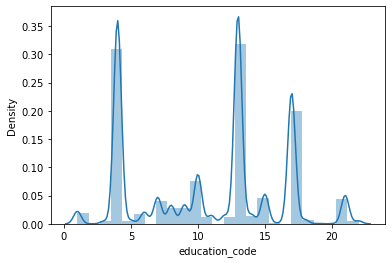

In [22]:
sns.distplot(df['education_code'], bins=25) # Shows extreme values

/Users/bethanybreed/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pay_grade', ylabel='Density'>

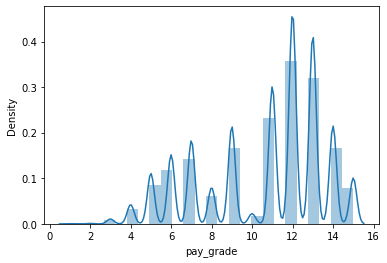

In [23]:
sns.distplot(df['pay_grade'], bins=25) # Shows extreme values

In [24]:
#I will leave them for now, as these are all within the expected ranges

### 4. Data Prep for Regression Analysis

### I am looking at Education Level and how it affects Pay Grade based off 08 Individual State Correlation Script

## Hypothesis Education Level affects Pay Grade in a positive manner

In [25]:
#double check data types
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141103 entries, 21 to 2155550
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sub_agency           141103 non-null  object 
 1   country              141103 non-null  object 
 2   age_level            141103 non-null  object 
 3   education_level      141103 non-null  object 
 4   pay_grade            141103 non-null  float64
 5   years_grouping       141103 non-null  object 
 6   occupation           141103 non-null  object 
 7   occupation_category  141103 non-null  object 
 8   pay_plan             141103 non-null  object 
 9   stem                 141103 non-null  int64  
 10  supervisor_status    141103 non-null  object 
 11  full_time            141103 non-null  object 
 12  work_status          141103 non-null  object 
 13  date                 141103 non-null  object 
 14  salary               140479 non-null  float64
 15  years_of_servic

In [26]:
df_cali.pay_grade.value_counts(dropna = False)

11.0    65143
12.0    18155
13.0    11146
9.0      9619
7.0      9045
6.0      7470
5.0      6377
14.0     4638
8.0      3863
4.0      2224
15.0     1999
10.0      904
3.0       483
2.0        22
1.0        15
Name: pay_grade, dtype: int64

In [27]:
df_cali.education_code.value_counts(dropna = False)

13    38744
4     35919
17    22165
10     8799
15     5884
7      5238
21     5199
9      3814
8      3457
6      2350
1      2120
14     1686
12     1588
11     1540
3       718
5       646
18      570
22      428
16      116
19       43
20       40
2        39
Name: education_code, dtype: int64

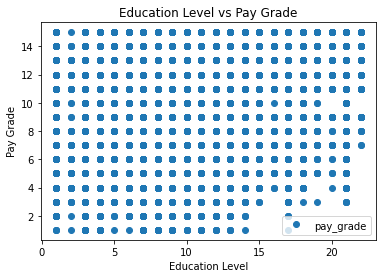

In [28]:
# Create a scatterplot using matplotlib to check how variables work together

df.plot(x = 'education_code', y='pay_grade',style='o') 
plt.title('Education Level vs Pay Grade')  
plt.xlabel('Education Level')  
plt.ylabel('Pay Grade')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cali['education_code'].values.reshape(-1,1)
y = df_cali['pay_grade'].values.reshape(-1,1)

In [30]:
X

array([[13],
       [17],
       [13],
       ...,
       [13],
       [ 9],
       [17]])

In [31]:
y

array([[13.],
       [13.],
       [13.],
       ...,
       [11.],
       [ 7.],
       [11.]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [33]:
# Create a regression object.

regression = LinearRegression()

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

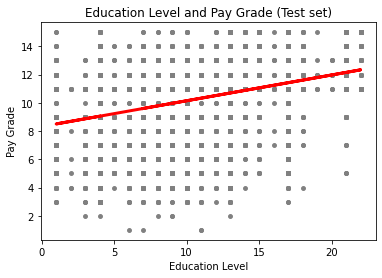

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Education Level and Pay Grade (Test set)')
plot_test.xlabel('Education Level')
plot_test.ylabel('Pay Grade')
plot_test.show()

### The line shows a positive impact that education level has on pay grade.  As the line has a low slope it is not a high correlation.  Also as you can the high amount of dots that are not close to the line, that implies the correlation is not strong as we would have expected it to be.

### 6. Check Model Performance with statistics

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [38]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.1824853]]
Mean squared error:  5.019694769974021
R2 score:  0.15540937062098792


In [39]:
y_predicted

array([[ 9.60040342],
       [11.06028581],
       [11.06028581],
       ...,
       [10.69531522],
       [10.51282992],
       [ 9.05294753]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(30)

,Actual,Predicted
0,9.0,9.600403
1,14.0,11.060286
2,11.0,11.060286
3,7.0,9.052948
4,11.0,8.505492
5,13.0,11.425256
6,12.0,9.052948
7,11.0,10.695315
8,9.0,12.155198
9,6.0,10.695315


## 7. Conclusion

### Follow up with the statistics show the MSE as a 5. This is still large enough to indicate many plots that are far from our trend line. the R2 score is .155 We would hope to see a value closer to 1 to indicate a good fit.

### This shows that education code (the level of your education) does not directly correlate with your pay grade even though the variables seem to have a slight relationship